<a href="https://colab.research.google.com/github/nurayyozden/Earthquake-Project/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LinearRegression

In [2]:
# to only read the non-hidden columns
cols = ['Date', 'Year', 'Month', 'Occurance Time', 'Datetime', 'Latitude', 'Longitude', 'Depth',
        'Largest Magnitude', 'Magnitude Duration', 'Magnitude Local',
        'Magnitude Moment', 'Magnitude Surface Wave', 'Magnitude Body Wave', 'Location',
        'Missing MD', 'Missing ML', 'Missing MM', 'Missing MSW', 'Missing MBW']


df = pd.read_excel("/content/drive/My Drive/BIG GIRL NUNI/project1_turkey.xlsx", usecols = cols)

In [3]:
# deleting the rows with corrupted data
df = df.drop([6786, 16597, 19907])

In [4]:
df.head()

,Date,Year,Month,Occurance Time,Datetime,Latitude,Longitude,Depth,Largest Magnitude,Magnitude Duration,Magnitude Local,Magnitude Moment,Magnitude Surface Wave,Magnitude Body Wave,Location,Missing MD,Missing ML,Missing MM,Missing MSW,Missing MBW
0,2023-04-30 00:00:00,2023,4,13:01:28,2023-04-30 13:01:28.416000,38.3392,37.7633,8.7,4.3,0.0,4.3,4.3,0.0,0.0,MALATYA,1,0.0,0,1,1
1,2023-04-30 00:00:00,2023,4,04:02:53.490000,2023-04-30 04:02:53.088000,40.8077,31.0708,3.7,3.5,0.0,3.5,3.4,0.0,0.0,DUZCE,1,0.0,0,1,1
2,2023-04-30 00:00:00,2023,4,02:51:22.150000,2023-04-30 02:51:22.464000,35.6422,34.0252,22.4,3.5,0.0,3.5,3.5,0.0,0.0,AKDENIZ,1,0.0,0,1,1
3,2023-04-29 00:00:00,2023,4,19:48:32.870000,2023-04-29 19:48:32.832000,37.8623,36.2185,5.0,4.0,0.0,3.9,4.0,0.0,0.0,ADANA,1,0.0,0,1,1
4,2023-04-29 00:00:00,2023,4,17:58:29.200000,2023-04-29 17:58:29.280000,38.0220,36.4457,5.0,3.7,0.0,3.7,3.4,0.0,0.0,KAHRAMANMARAS,1,0.0,0,1,1


# Linear regression

My first model is a linear regression model that predicts Largest Mangitude feature given the Month, Latitude, Longitude and Year it occured.

In [5]:
x_cols = ['Month', 'Latitude', 'Longitude', 'Year']
y_col = 'Largest Magnitude'

# One-hot encoding for the Location column, which is a categorical variable
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df_encoded[x_cols].values
y = df_encoded[y_col].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_tr, y_tr)

y_pred = model.predict(X_te)

result = pd.DataFrame({'Actual': y_te, 'Predicted': y_pred})
print(result)

      Actual  Predicted
0        4.2   4.204346
1        4.0   4.121826
2        3.5   3.941287
3        3.6   4.018099
4        3.5   4.132494
...      ...        ...
3976     4.7   3.625222
3977     4.2   3.619115
3978     4.5   3.702069
3979     3.9   4.435872
3980     3.5   3.844840

[3981 rows x 2 columns]


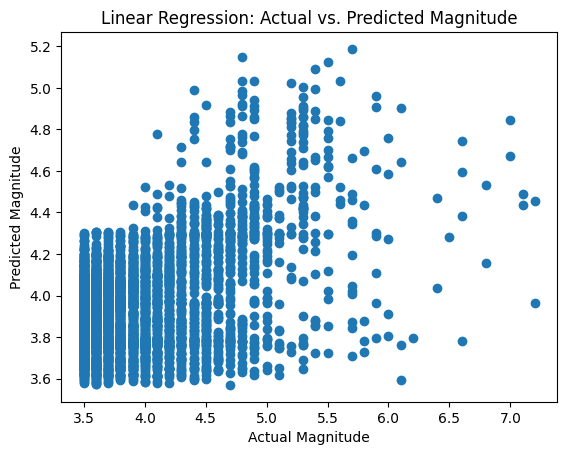

In [6]:
# To visually understand the accuracy of the model
plt.scatter(y_te, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Linear Regression: Actual vs. Predicted Magnitude')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_te, y_pred)
mse

0.2203190040964851

Based on the size of the dataset and scale of the target variable, I believe the model is underfitting, so I will add more features; specifically the Depth feature and the binary features indicating whether that magntiude is missing or not.

In [8]:
x_cols2 = ['Month', 'Latitude', 'Longitude', 'Year', 'Depth', 'Missing MD', 'Missing ML', 'Missing MM', 'Missing MSW', 'Missing MBW']
y_col2 = 'Largest Magnitude'


X = df_encoded[x_cols2].values
y = df_encoded[y_col2].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)


model = LinearRegression()
model.fit(X_tr, y_tr)


y_pred = model.predict(X_te)

result = pd.DataFrame({'Actual': y_te, 'Predicted': y_pred})
print(result)


      Actual  Predicted
0        5.2   3.945429
1        4.0   3.961185
2        3.5   3.730823
3        5.4   5.053497
4        3.6   4.033167
...      ...        ...
3976     3.7   3.715391
3977     4.2   4.028608
3978     3.7   3.779938
3979     3.5   3.787307
3980     3.7   3.786340

[3981 rows x 2 columns]


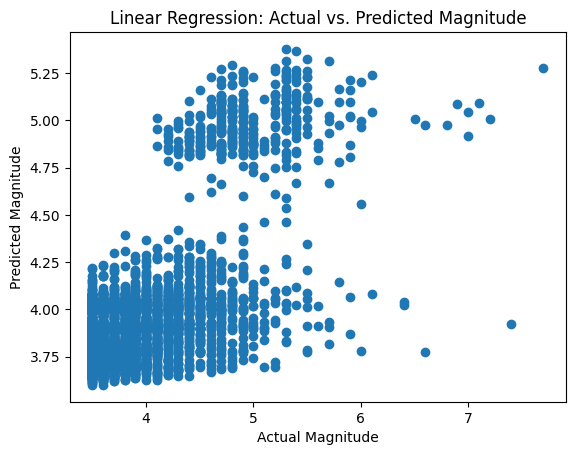

In [9]:
plt.scatter(y_te, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Linear Regression: Actual vs. Predicted Magnitude')
plt.show()

In [10]:
mse = mean_squared_error(y_te, y_pred)
mse

0.15086255658150166

As we, adding in the 'Depth' parameter as well as the paramters representing where certain magntiude measurements are missing improved accuracy of the model.

# Classifying Earthqaukes using Random Forest Classifier
We'll be starting with the Year, Month, Latitude, Longitude, and Depth features as inputs to catgorize earthqaukes' Largest Magnitude. I have split up mangitude into 3 categories: High, Medium and Low. High has a magnitude greater than 5.0, Medium is between 4.0 and 5.0, and Low is less than 4.0. This is based on the distribution of the Largest Magnitudes of the earthqaukes in the datatset.



In [12]:
x_cols3 = ['Year', 'Month', 'Latitude', 'Longitude', 'Depth']
y_col3 = 'Largest Magnitude'


X = df_encoded[x_cols3].values
y = df_encoded[y_col3].values

# Mapping earthquake Largest Magnitude to three levels: High, Medium, Low
def map_magnitude_to_level(magnitude):
    if magnitude >= 5.0:
        return 'High'
    elif magnitude >= 4.0:
        return 'Medium'
    else:
        return 'Low'

y_categorical = [map_magnitude_to_level(magnitude) for magnitude in y]


X_tr, X_te, y_tr, y_te = train_test_split(X, y_categorical, test_size=0.2)


model = RandomForestClassifier()
model.fit(X_tr, y_tr)


y_pred = model.predict(X_te)


accuracy = accuracy_score(y_te, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7035920622959055


I will now add the binary Missing Magnitude features to the model to attempt to improve the accuracy.

In [13]:
x_cols4 = ['Year', 'Month', 'Latitude', 'Longitude', 'Depth',
                    'Missing MD', 'Missing ML', 'Missing MM', 'Missing MSW', 'Missing MBW']
y_col4 = 'Largest Magnitude'


# Split the data into features and target
X = df_encoded[x_cols4].values
y = df_encoded[y_col4].values


X_tr, X_te, y_tr, y_te = train_test_split(X, y_categorical, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_tr, y_tr)

y_pred = model.predict(X_te)


accuracy = accuracy_score(y_te, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7488068324541572


Adding the Missing Magnitude features improved the accuracy of the model by approximately 4%. While the accuracy is not ideal, this is the maximum amount of features I can add to the model. If I were to add the Magnitude features, of which the target varibale Largest Madnitude is the largest of for that data point, that would raise issues of multicollinearity and skew the results.